Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/archive(9).zip')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

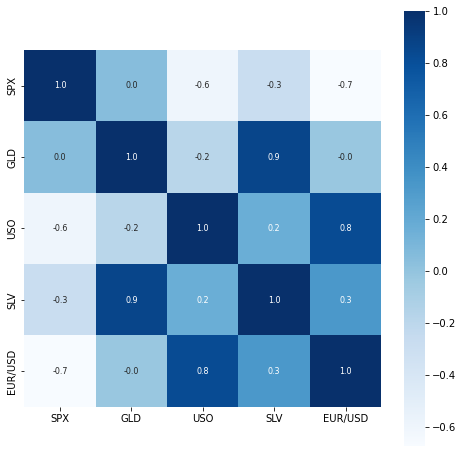

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [12]:
#storing numerical column names to a variable
numerical=[i for i in gold_data.columns if gold_data[i].dtype!='O']
print('The numerical variables are',numerical)

The numerical variables are ['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD']


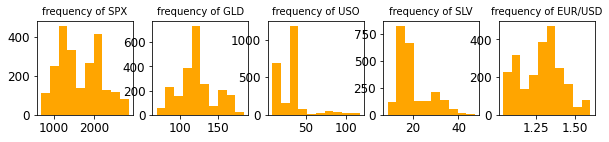

In [13]:
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    
        ax1 = plt.subplot(5,5,plotnumber)
        plt.hist(gold_data[i],color='ORANGE')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
        plotnumber +=1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

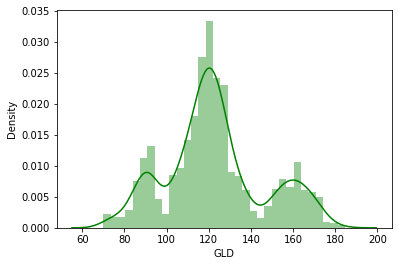

In [14]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

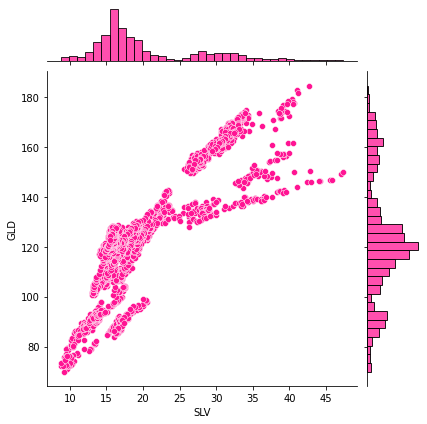

In [15]:
#Now we check the relation in SLV with GLD variable
sns.jointplot(x =gold_data['SLV'], y =gold_data['GLD'], color = 'deeppink')




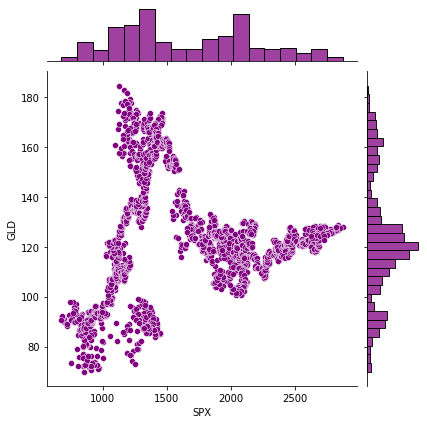

In [16]:
#Now we check the relation SPX with GLD variable
sns.jointplot(x =gold_data['SPX'], y =gold_data['GLD'], color = 'purple')


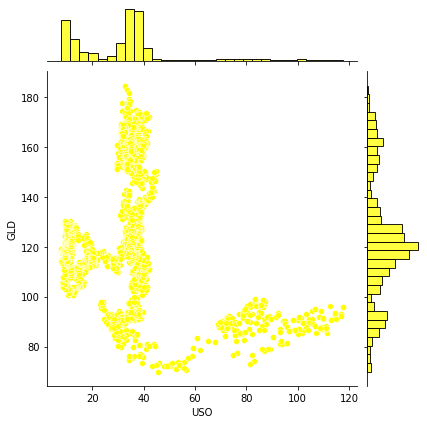

In [17]:
sns.jointplot(x =gold_data['USO'], y =gold_data['GLD'], color = 'yellow')

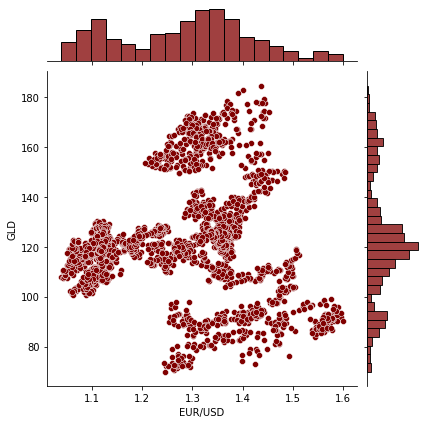

In [18]:
sns.jointplot(x =gold_data['EUR/USD'], y =gold_data['GLD'], color = 'MAROON')

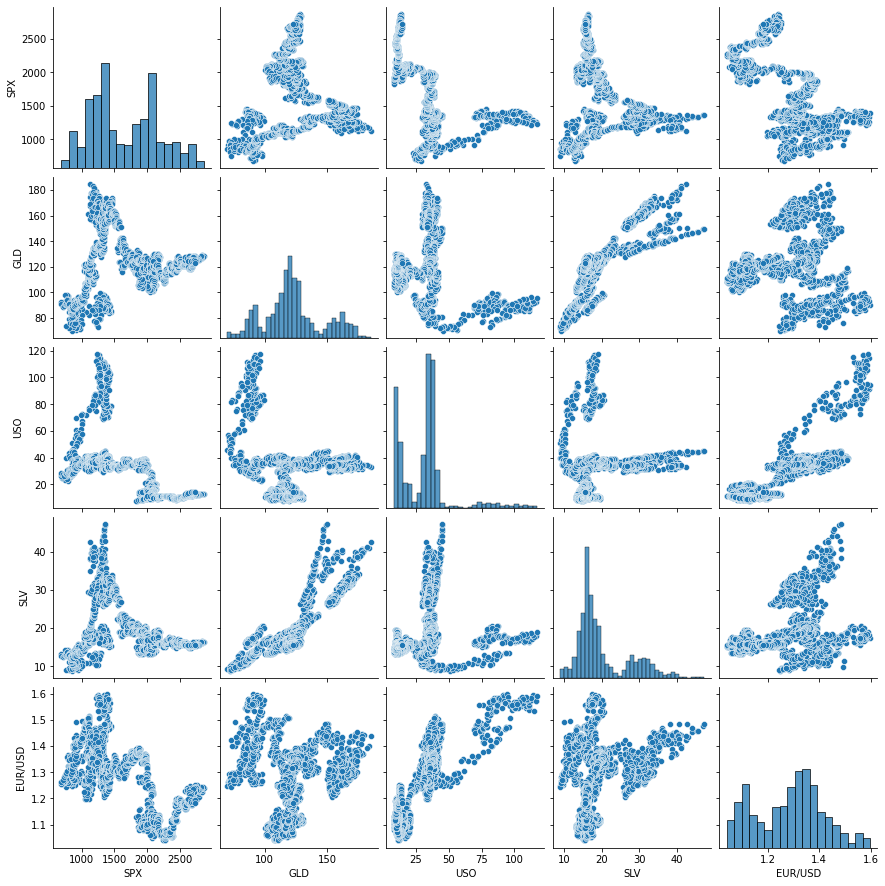

In [19]:
sns.pairplot(gold_data)

Splitting the Features and Target

In [20]:
x= gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [21]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [23]:
#converting data to training data and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,SPX,USO,SLV,EUR/USD
1572,2099.679932,19.260000,15.750000,1.140472
1467,2001.540039,34.700001,18.260000,1.289108
1574,2110.300049,18.650000,15.540000,1.136674
567,1089.469971,34.740002,17.530001,1.284406
1292,1802.479980,33.820000,19.270000,1.355234
...,...,...,...,...
1638,2095.840088,19.660000,15.480000,1.120787
1095,1426.189941,33.369999,29.370001,1.322769
1130,1502.420044,33.430000,27.730000,1.327316
1294,1807.229980,33.189999,18.959999,1.356779


Model training

In [24]:
#Defined object from library Regression 

LR = LinearRegression()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
KNR = KNeighborsRegressor()
XGB = XGBRegressor()


In [25]:
# make for loop for Regression 

model = [LR,DTR,RFR,KNR,XGB]
d = {}
for i in model:
    i.fit(x_train,y_train)
    ypred = i.predict(x_test)
    print(i,":",r2_score(y_test,ypred)*100)
    d.update({str(i):i.score(x_test,y_test)*100})


LinearRegression() : 89.46218884172447
DecisionTreeRegressor() : 98.27247121921931
RandomForestRegressor() : 99.00083602187712
KNeighborsRegressor() : 94.26770059305373
[04:11:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor() : 98.04063005228383


In [26]:
df = pd.DataFrame.from_dict(d, orient='index', columns=['Accuracy'])
df = df.sort_values(by='Accuracy', ascending=False)
print(df)

#This will create a dataframe 'df' containing the scores of each model on the test data. The 'orient' parameter is set to 'index' to create the dataframe from the dictionary keys (i.e., the model names) and the 'columns' parameter is set to 'Score' to name the column containing the scores.


                          Accuracy
RandomForestRegressor()  99.000836
DecisionTreeRegressor()  98.272471
XGBRegressor()           98.040630
KNeighborsRegressor()    94.267701
LinearRegression()       89.462189


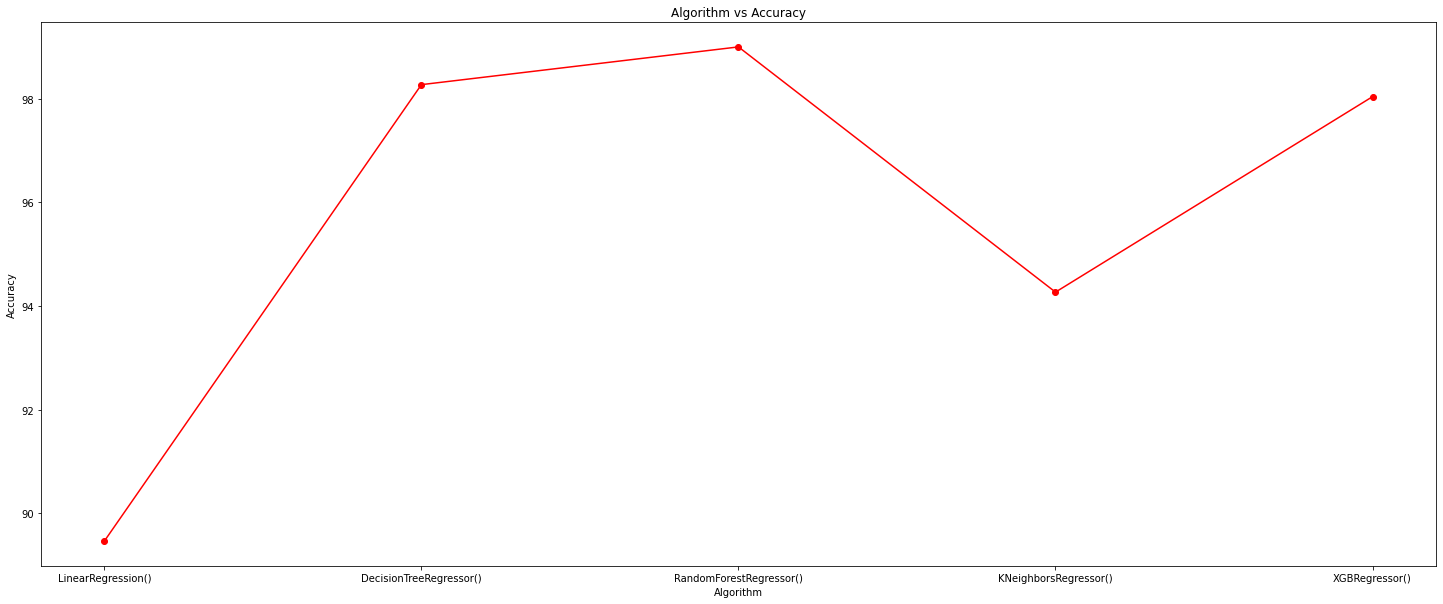

In [27]:
# make graph about Accuracy
plt.figure(figsize=(25, 10))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.plot(d.keys(),d.values(),marker='o',color='red')
plt.show()


Model Training:
Random Forest Regressor

Model Evaluation

In [28]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [29]:
 #prediction on Test Data
test_data_prediction = regressor.predict(x_test)
test_data_prediction

array([122.49809979, 129.99100345, 127.74739998,  97.61519924,
       118.79910049, 114.73849954, 125.10510108, 117.73259959,
       107.9097011 ,  98.61149965,  96.04819978, 167.4556983 ,
       147.50230081, 115.83790064, 170.96630072,  84.83049946,
       123.91789896, 109.24159717, 111.83660081, 131.49410316,
       124.15559968, 113.51940086, 115.34280032, 108.75409954,
       107.96259974, 125.77019968, 119.42499988, 112.6231988 ,
       113.25770154, 126.11769896, 145.71530196,  89.16709967,
       167.89199888, 113.71549884, 108.37890065, 120.02440054,
       141.62189848, 160.68720089, 173.79059827, 152.85870094,
       119.49490082, 111.24220081, 121.37549975, 113.65089935,
       122.03329992, 108.09270087,  88.31639912, 114.24889931,
       129.93680308, 118.03520128, 104.30530002, 129.9853029 ,
       107.47139768, 161.04630499, 131.469101  , 117.74329971,
       147.57759941, 136.31610233,  95.63590078, 124.54810105,
       114.80489914,  86.51110158, 104.30099884, 113.99

In [30]:

per=mean_absolute_percentage_error(y_test,test_data_prediction)
per

0.01090877393795293



Compare the Actual Values and Predicted Values in a Plot 


In [31]:
y_test = list(y_test)
y_test

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

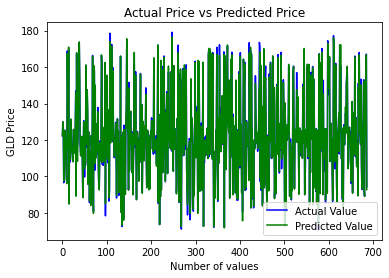

In [32]:
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()